In [8]:
import numpy as np


def generate_toeplitz(size: int, param_c: float, param_alpha: float) -> np.array:
    n, c, a = size, param_c, param_alpha
    
    i = np.arange(n, dtype=float)
    j = np.arange(n, dtype=float)
    diff = np.abs(i[:, None] - j)
    toeplitz = (np.identity(n) + c * diff) ** a
    return toeplitz





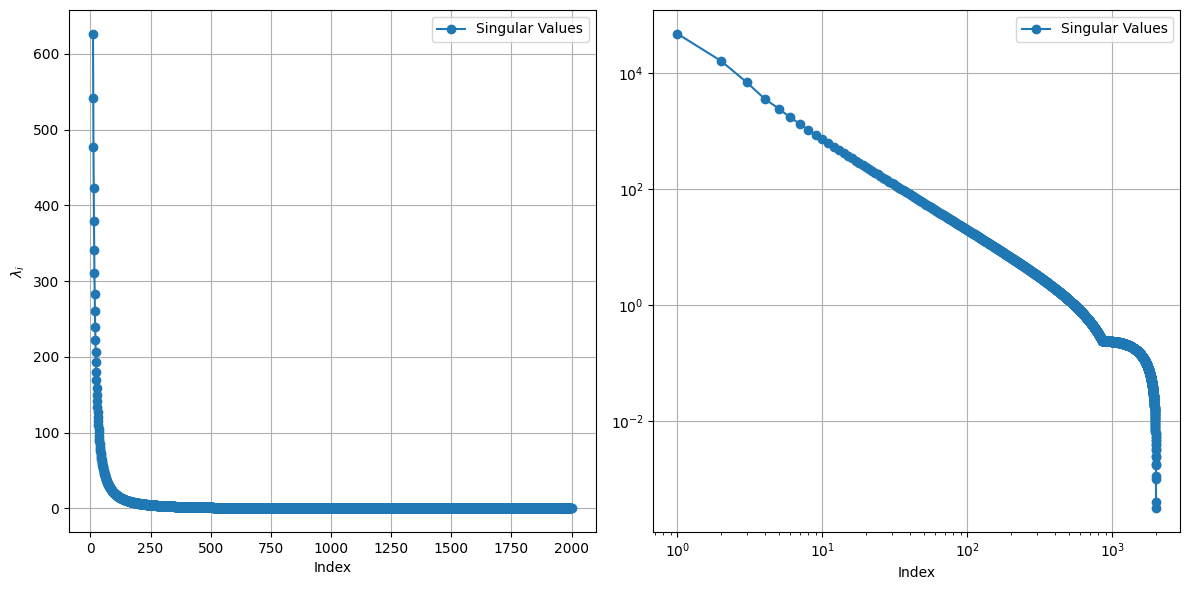

In [24]:
from math import gamma

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


PARAM_SIZE = 2000
PARAM_ALPHA = 0.5
PARAM_C = 1

T = generate_toeplitz(size=PARAM_SIZE, param_c=PARAM_C, param_alpha=PARAM_ALPHA)
S= np.linalg.svd(T, compute_uv=False, hermitian=True)

indices = np.arange(1, len(S) + 1, dtype=float)
log_indices = np.log(indices)
log_lambda  = np.log(S)


#bulk_fit = PARAM_C * gamma(PARAM_ALPHA + 1) * (PARAM_SIZE / indices) ** (1 + PARAM_ALPHA)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 特異値とフィッティング結果をプロット
axs[0].plot(indices[10:], S[10:], marker='o', label='Singular Values')
#axs[0].plot(indices[10:], bulk_fit[10:], '--')
axs[0].set_xlabel("Index")
axs[0].set_ylabel(r"$\lambda_i$")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(indices, S, marker='o', label='Singular Values')
#axs[1].plot(indices, bulk_fit, '--')
axs[1].set_xlabel('Index')
axs[0].set_ylabel(r"$\lambda_i$")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].grid(True)
plt.tight_layout()
plt.show()